# 라이브러리 불러오기

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 한글폰트 적용

In [56]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

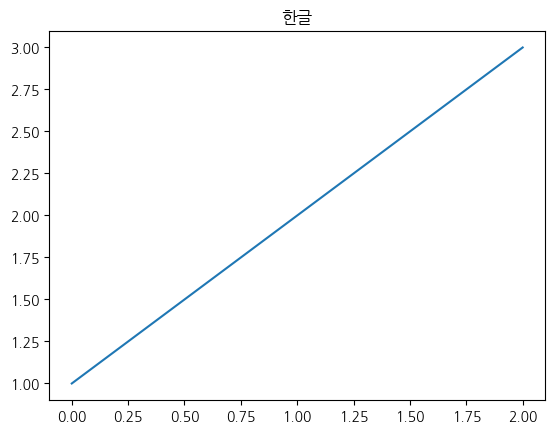

In [57]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글드라이브 연동

In [58]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기(csv-역코드-)

In [59]:
# 데이터 로드
DATA_PATH = '/content/drive/MyDrive/세미 프로젝트/호선별_역코드.csv'
data = pd.read_csv(DATA_PATH, encoding='utf-8')
data

전철역코드   전철역명    호선   외부코드
0      244     용답  02호선  211-1
1      245     신답  02호선  211-2
2      250     용두  02호선  211-3
3      336    학여울  03호선    346
4      428    삼각지  04호선    428
..     ...    ...   ...    ...
406    158    청량리  01호선    124
407    159    동묘앞  01호선    127
408    200    까치산  02호선  234-4
409    201     시청  02호선    201
410    202  을지로입구  02호선    202

[411 rows x 4 columns]

In [60]:
# 데이터프레임의 컬럼 확인
columns = data.columns
print(columns)

Index(['전철역코드', '전철역명', '호선', '외부코드'], dtype='object')


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전철역코드   411 non-null    int64 
 1   전철역명    411 non-null    object
 2   호선      411 non-null    object
 3   외부코드    411 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.0+ KB


## 5-8호선 데이터 프레임

In [62]:
# '호선' 컬럼에서 '05호선', '06호선', '07호선', '08호선'의 값을 가진 데이터 필터링
filtered_data = data[data['호선'].isin(['05호선', '06호선', '07호선', '08호선'])]

# '호선' 컬럼을 기준으로 정렬
sorted_filtered_data = filtered_data.sort_values(by='호선')

# 정렬된 데이터프레임 출력
print(sorted_filtered_data)

     전철역코드       전철역명    호선 외부코드
314   2536      을지로4가  05호선  535
349   2566      하남검단산  05호선  558
316   2539        신금호  05호선  538
315   2537  동대문역사문화공원  05호선  536
289   2529         마포  05호선  528
..     ...        ...   ...  ...
396   2827         모란  08호선  827
324   2811         암사  08호선  810
325   2812         천호  08호선  811
56    2816         석촌  08호선  815
397   2828        남위례  08호선  821

[166 rows x 4 columns]


## 전철역코드 5~8호선 중 제일 작은 값, 큰 값 확인

In [63]:
# '05호선'의 데이터 필터링
line_05_data = data[data['호선'] == '05호선']

# '05호선' 중에서 제일 작은 전철역코드 찾기
min_code_05 = line_05_data['전철역코드'].min()

# '08호선'의 데이터 필터링
line_08_data = data[data['호선'] == '08호선']

# '08호선' 중에서 제일 큰 전철역코드 찾기
max_code_08 = line_08_data['전철역코드'].max()

# 결과 출력
print('05호선의 제일 작은 전철역코드:', min_code_05)
print('08호선의 제일 큰 전철역코드:', max_code_08)

05호선의 제일 작은 전철역코드: 2511
08호선의 제일 큰 전철역코드: 2828


## api 불러오기

In [72]:
import requests
import json
import pandas as pd

SERVICE_KEY = '4543696d6b74686438386d66524171'

# 데이터에서 '전철역코드' 컬럼을 가져와서 필터링
st_codes = data[data['전철역코드'].between(2511, 2828)]['전철역코드'].tolist()

# 결과를 저장할 리스트
results = []

for st_code in st_codes:
    for i in range(1, 4):
        for k in range(1, 3):
            url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/SearchSTNTimeTableByIDService/1/1000/{st_code}/{i}/{k}/'

            # API 요청
            req = requests.get(url)

            try:
                # JSON 데이터 파싱
                data1 = req.json()

                # 필요한 정보 추출 (역 코드, 역 이름, 요일, 상하선, 도착시간)
                row = data1['SearchSTNTimeTableByIDService']['row'][0]
                station_cd = row['STATION_CD']
                station_name = row['STATION_NM']
                line_num = row['LINE_NUM']
                week_tag = row['WEEK_TAG']
                inout_tag = row['INOUT_TAG']
                arrival_time = row['ARRIVETIME']

                # 결과를 딕셔너리로 저장
                result = {
                    'STATION_CD': station_cd,
                    'STATION_NM': station_name,
                    'LINE_NUM': line_num,
                    'WEEK_TAG': week_tag,
                    'INOUT_TAG': inout_tag,
                    'ARRIVETIME': arrival_time
                }

                results.append(result)
            except Exception as e:
                print(f"Error processing STATION_CD {st_code}: {str(e)}")

# 결과 리스트를 데이터프레임으로 변환
df1 = pd.DataFrame(results)

# 결과 출력
print(df1)

Error processing STATION_CD 2612: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2612: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2612: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2613: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2613: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2613: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2614: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2614: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2614: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2615: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2615: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2615: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2616: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2616: 'SearchSTNTimeTableByIDService'
Error processing STATION_CD 2616: 'SearchSTNTimeTableByIDService'
    STATIO

### 컬럼 명 수정

In [73]:
df1 = df1.rename(columns={
    'STATION_CD': '역 코드',
    'STATION_NM': '역 명',
    'LINE_NUM': '호선',
    'WEEK_TAG': '요일',
    'INOUT_TAG': '상/하행선',
    'ARRIVETIME': '도착시간'
})

# 결과 출력
print(df1)

     역 코드     역 명    호선 요일 상/하행선      도착시간
0    2620  월드컵경기장  06호선  1     1  05:40:10
1    2620  월드컵경기장  06호선  1     2  05:35:10
2    2620  월드컵경기장  06호선  2     1  05:40:10
3    2620  월드컵경기장  06호선  2     2  05:35:10
4    2620  월드컵경기장  06호선  3     1  05:40:10
..    ...     ...   ... ..   ...       ...
910  2828     남위례  08호선  1     2  05:32:50
911  2828     남위례  08호선  2     1  05:41:00
912  2828     남위례  08호선  2     2  05:32:50
913  2828     남위례  08호선  3     1  05:41:00
914  2828     남위례  08호선  3     2  05:32:50

[915 rows x 6 columns]
